Задание

Потренируем навыки, полученные на практическом занятии. 
Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, 
и попытайтесь обучить линейную модель наиболее качественно. 
Все ваши действия и решения описывайте в markdown.

Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)

Переменная, которую надо предсказать - ’MEDV’.
Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])

Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

In [1]:
import pandas as pd
import numpy as np

 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# функция получения accuracy модели
#Будем использовать линейную регрессию для тестирования качества данных
def get_score(X,y, random_seed=63, model=None):
    if model is None:
        model = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=63 )  
        model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# функция преобразования категориальных признаков в числовые
def get_one_hot(X, cols):
    for col in cols:
        dummies = pd.get_dummies(X[col], prefix=col, drop_first=False)
        X = pd.concat([X, dummies], axis=1)
    return X

In [5]:
#Изучаем данные
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Видим, что у CRIM, ZN, INDUS, CHAS, AGE, DIS, RAD сильное отклонение от среднего,
значит имеются выбросы

In [6]:
#Смотрим из каких уникальных значений состоят признаки в колонках
for col in data.columns:
    print(col, ':\t', len(data[col].unique()))

CRIM :	 504
ZN :	 26
INDUS :	 76
CHAS :	 2
NOX :	 81
RM :	 446
AGE :	 356
DIS :	 412
RAD :	 9
TAX :	 66
PTRATIO :	 46
B :	 357
LSTAT :	 455
MEDV :	 229


RAD, CHAS, ZN скорее всего категориальные признаки. RAD, CHAS переведем в числовые

In [7]:
#Смотрим из каких уникальных значений состоят признаки в колонках
for col in ['RAD', 'CHAS', 'ZN']:
    print(col, ':\t', data[col].unique())

RAD :	 [ 1  2  3  5  4  8  6  7 24]
CHAS :	 [0 1]
ZN :	 [ 18.    0.   12.5  75.   21.   90.   85.  100.   25.   17.5  80.   28.
  45.   60.   95.   82.5  30.   22.   20.   40.   55.   52.5  70.   34.
  33.   35. ]


In [8]:
# Смотрим на колелляцию признаков с таргетной переменной
data.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

имеется корелляция с 'RM', 'LSTAT':

'RM' - чем больше комнат в квартире, 
тем большая доля, что там проживают собственники жилья.

'LSTAT' - чем больше доля низших слоев населения а районе, 
тем ниже доля домов, в которых проживают собственники жилья.

По остальным признакам корелляция с целевой переменной несущественная

In [51]:
# Разделим датасет на данные с признаками X и целевой переменной y
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

In [52]:
# получаем первичный скор
get_score(X, y)

0.6826784431236101

In [53]:
# посмотрим с какими признаками accuracy имеет наибольшее значение

# Создаем функцию, колонки с признаками, дающими лучший score
def best_score(X, y):
    cols = X.columns
    features = []
    score = 0

    for i in range(len(cols)):
        temp_cols = list(set(cols) - set(features))
        temp_col = ''
        temp_features = []
        temp_features.extend(features)
        for col in temp_cols:
            temp_features.append(col)
            temp_score = get_score(X[temp_features], y)
            temp_features.remove(col)
            if score < temp_score:
                score = temp_score
                temp_col = col

        if len(temp_col) > 0: 
            features.append(temp_col)
            #print(features, score)
    return features, score

best_score(X, y)

(['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'B'], 0.7160361874957366)

Результат best_score лучше, чем get_score(X, y)

In [54]:
# Посмотрим score с нормалиованными данными
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain_sc = sc.fit_transform(X)
best_score(pd.DataFrame(Xtrain_sc, columns=X.columns), y)

(['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'B'], 0.7160361874957368)

Результат одинаковый, можно не нормализовывать

In [55]:
# Применим OneHotEncoding
X_ohe = get_one_hot(X, ['RAD', 'ZN'])
X_ohe.drop(['RAD', 'ZN'], axis=1, inplace=True)

In [59]:
# Посмотрим score с OneHotEncoding
best_score(X_ohe, y)

(['LSTAT',
  'RM',
  'PTRATIO',
  'RAD_3',
  'DIS',
  'NOX',
  'ZN_95.0',
  'B',
  'ZN_22.0',
  'RAD_8',
  'ZN_20.0',
  'ZN_28.0',
  'RAD_1',
  'ZN_40.0',
  'ZN_60.0',
  'ZN_80.0',
  'ZN_45.0',
  'ZN_82.5',
  'ZN_21.0',
  'ZN_85.0',
  'ZN_52.5',
  'ZN_25.0'],
 0.7460269993341546)

Score улучшился

Посмотрим на выбросы в ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'B']:

30.81

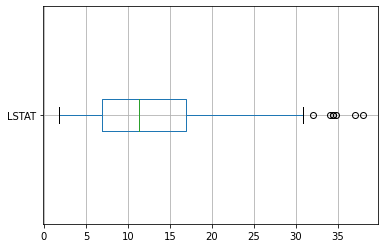

In [63]:
bp = X_ohe.boxplot(['LSTAT'], vert=False, return_type='dict')
# получаем крайнюю правую часть уса
high_LSTAT = bp['whiskers'][1].get_xdata()[1]
high_LSTAT


In [61]:
# Заменим значения с выбросами на медиану

X_ohe_lstat = X_ohe.copy()
X_ohe_lstat.loc[X_ohe_lstat[X_ohe_lstat['LSTAT'] > high_LSTAT].index, 'LSTAT'] = X_ohe_lstat['LSTAT'].median()

In [62]:
best_score(X_ohe_lstat, y)

(['LSTAT',
  'RM',
  'PTRATIO',
  'B',
  'RAD_1',
  'RAD_3',
  'DIS',
  'NOX',
  'ZN_95.0',
  'CRIM',
  'ZN_0.0',
  'ZN_28.0',
  'ZN_90.0',
  'ZN_22.0',
  'RAD_8',
  'ZN_80.0',
  'ZN_60.0',
  'ZN_25.0',
  'ZN_21.0',
  'ZN_34.0',
  'RAD_6',
  'ZN_30.0',
  'ZN_82.5',
  'ZN_55.0',
  'ZN_45.0'],
 0.764809275760405)

Score улучшился

(4.88, 7.691)

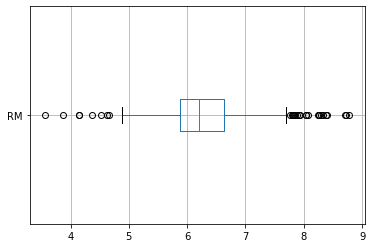

In [67]:
bp = X_ohe.boxplot(['RM'], vert=False, return_type='dict')
# получаем крайние части уса
low_RM = bp['whiskers'][0].get_xdata()[1]
high_RM = bp['whiskers'][1].get_xdata()[1]
low_RM, high_RM

In [70]:
X_ohe_ls_rm = X_ohe_lstat.copy()
X_ohe_ls_rm.loc[X_ohe_ls_rm[X_ohe_ls_rm['RM'] > high_RM].index, 'RM'] = X_ohe_ls_rm['RM'].median()
X_ohe_ls_rm.loc[X_ohe_ls_rm[X_ohe_ls_rm['RM'] < low_RM].index, 'RM'] = X_ohe_ls_rm['RM'].median()

In [71]:
best_score(X_ohe_ls_rm, y)

(['LSTAT',
  'PTRATIO',
  'DIS',
  'NOX',
  'ZN_95.0',
  'CRIM',
  'RM',
  'ZN_20.0',
  'ZN_90.0',
  'RAD_1',
  'B',
  'ZN_28.0',
  'RAD_5',
  'RAD_6',
  'ZN_22.0',
  'INDUS',
  'ZN_21.0',
  'ZN_34.0',
  'ZN_0.0',
  'ZN_60.0',
  'RAD_3',
  'ZN_30.0',
  'ZN_80.0',
  'ZN_45.0'],
 0.7108324792426159)

Score снизился, не применяем по RM замену выбросов

13.6

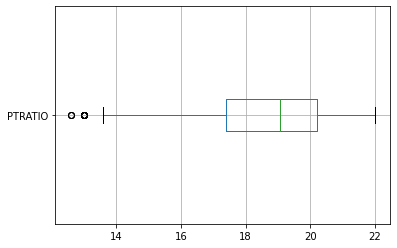

In [72]:
bp = X_ohe.boxplot(['PTRATIO'], vert=False, return_type='dict')
# получаем крайнюю левую часть уса
low_pt = bp['whiskers'][0].get_xdata()[1]
low_pt

In [73]:
X_ohe_ls_pt = X_ohe_lstat.copy()
X_ohe_ls_pt.loc[X_ohe_ls_pt[X_ohe_ls_pt['PTRATIO'] < low_pt].index, 'PTRATIO'] = X_ohe_ls_pt['PTRATIO'].median()

In [74]:
best_score(X_ohe_ls_pt, y)

(['LSTAT',
  'RM',
  'CRIM',
  'ZN_20.0',
  'ZN_95.0',
  'DIS',
  'PTRATIO',
  'NOX',
  'RAD_1',
  'ZN_90.0',
  'ZN_80.0',
  'B',
  'ZN_28.0',
  'ZN_22.0',
  'RAD_8',
  'RAD_3',
  'ZN_0.0',
  'ZN_60.0',
  'ZN_25.0',
  'ZN_34.0',
  'ZN_21.0',
  'ZN_52.5',
  'ZN_82.5',
  'ZN_45.0',
  'ZN_85.0'],
 0.7619349960546407)

Score снизился, не применяем по PTRATIO замену выбросов

9.2229

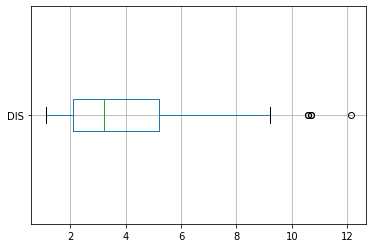

In [78]:
bp = X.boxplot(['DIS'], vert=False, return_type='dict')
# получаем крайнюю правую часть уса
high_d = bp['whiskers'][1].get_xdata()[1]
high_d


In [77]:
X_ohe_ls_d = X_ohe_lstat.copy()
X_ohe_ls_d.loc[X_ohe_ls_d[X_ohe_ls_d['DIS'] > high_d].index, 'DIS'] = X_ohe_ls_d['DIS'].median()

In [79]:
best_score(X_ohe_ls_d, y)

(['LSTAT',
  'RM',
  'PTRATIO',
  'B',
  'DIS',
  'NOX',
  'RAD_3',
  'ZN_95.0',
  'CRIM',
  'ZN_22.0',
  'RAD_8',
  'TAX',
  'ZN_20.0',
  'ZN_90.0',
  'ZN_28.0',
  'RAD_1',
  'ZN_40.0',
  'ZN_80.0',
  'ZN_45.0',
  'ZN_82.5',
  'ZN_85.0',
  'ZN_52.5'],
 0.7626756747615573)

Score снизился, не применяем по DIS замену выбросов

0.385

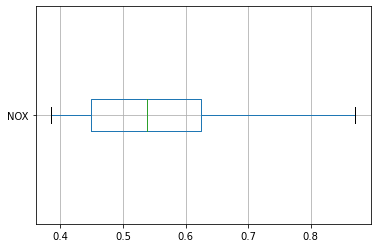

In [80]:
bp = X.boxplot(['NOX'], vert=False, return_type='dict')
# получаем крайнюю левую часть уса
high_d = bp['whiskers'][0].get_xdata()[1]
high_d

NOX без выбросов, не меняем

344.91

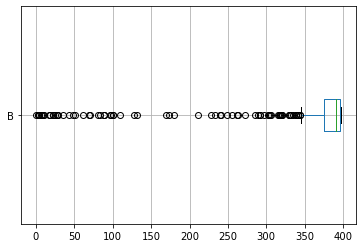

In [81]:
bp = X.boxplot(['B'], vert=False, return_type='dict')
# получаем крайнюю левую часть уса
low_B = bp['whiskers'][0].get_xdata()[1]
low_B


In [82]:
X_ohe_ls_b = X_ohe_lstat.copy()
X_ohe_ls_b.loc[X_ohe_ls_b[X_ohe_ls_b['B'] < low_B].index, 'B'] = X_ohe_ls_b['B'].median()

In [83]:
best_score(X_ohe_ls_b, y)

(['LSTAT',
  'RM',
  'PTRATIO',
  'RAD_1',
  'RAD_3',
  'CRIM',
  'DIS',
  'NOX',
  'B',
  'ZN_95.0',
  'ZN_0.0',
  'ZN_28.0',
  'ZN_90.0',
  'RAD_8',
  'ZN_22.0',
  'ZN_80.0',
  'ZN_60.0',
  'ZN_34.0',
  'ZN_85.0',
  'ZN_20.0',
  'ZN_45.0',
  'ZN_82.5',
  'ZN_21.0',
  'ZN_55.0'],
 0.7670548235027472)

Score повысился.
### ИТОГ 
##### начальный score: 0.6826784431236101
##### итоговый score : 0.7670548235027472
Отличный результат!